In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [8]:
num_arms = 10
mean = 0.5
stddev = 0.1
arms = np.random.normal(mean, stddev, size=num_arms)

In [9]:
arms

array([0.45285749, 0.32047642, 0.64302257, 0.61813898, 0.50272791,
       0.49182498, 0.48313507, 0.53271742, 0.68000776, 0.49970416])

In [10]:
class EpsilonGreedy:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)

    def select_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [11]:
num_trials = 1000
epsilon = 0.1

bandit = EpsilonGreedy(num_arms=num_arms, epsilon=epsilon)
rewards = []

for i in range(num_trials):
    action = bandit.select_action()
    reward = np.random.binomial(1, arms[action])
    bandit.update(action, reward)
    rewards.append(reward)

In [14]:
print(rewards)
print(len(rewards))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 

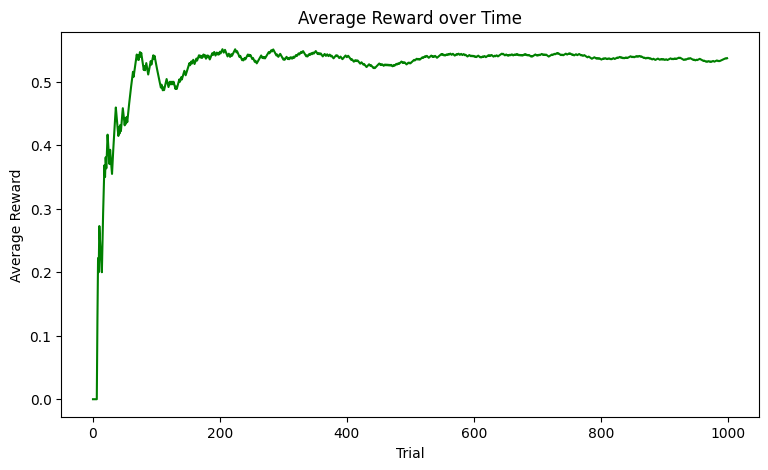

In [15]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color = 'green')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns


In [ ]:
class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.means = np.random.normal(0, 1, k)
        self.optimal_action = np.argmax(self.means)

    def pull(self, action):
        return np.random.normal(self.means[action], 1)


In [ ]:
class Greedy:
    def __init__(self, k):
        self.k = k
        self.values = np.zeros(k)
        self.counts = np.zeros(k)
    
    def select_action(self):
        return np.argmax(self.values)
    
    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]


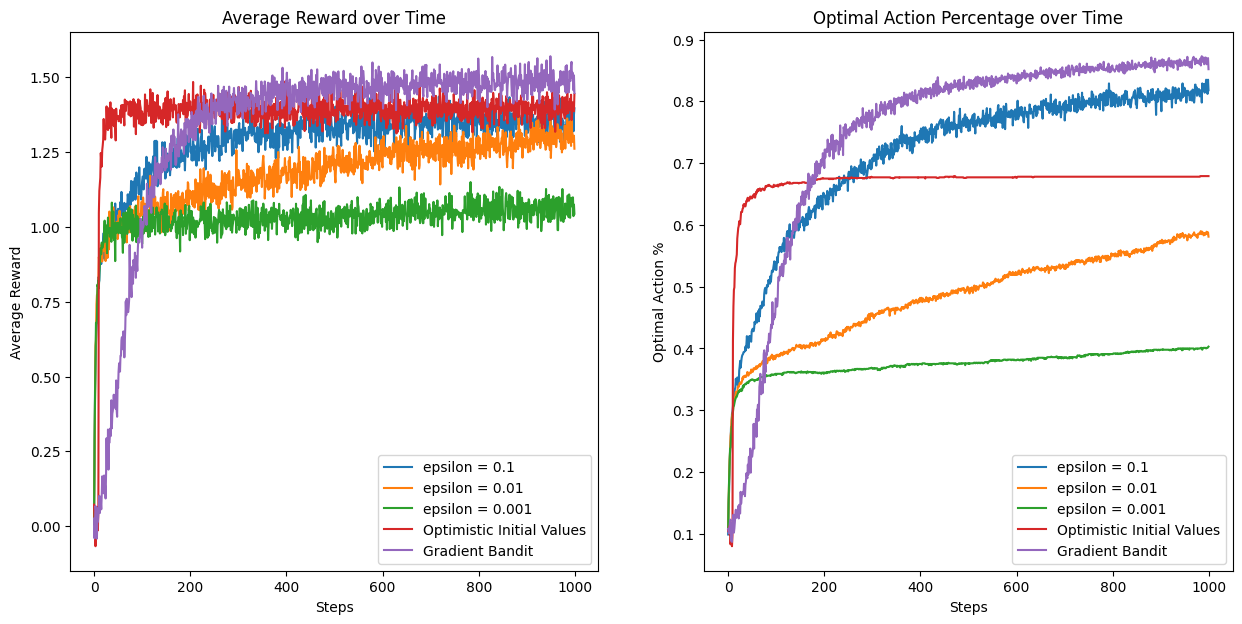

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 10
n_problems = 1000
n_steps = 1000

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    return np.random.randn(n_problems, k)

# Function to run the epsilon-greedy algorithm
def epsilon_greedy(k, n_steps, epsilon, true_means):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Function to run the optimistic initial values algorithm
def optimistic_initial_values(k, n_steps, initial_value, true_means):
    q_values = np.ones(k) * initial_value
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Function to run the gradient bandit algorithm
def gradient_bandit(k, n_steps, alpha, true_means):
    h_values = np.zeros(k)
    action_probs = np.ones(k) / k
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.random.choice(np.arange(k), p=action_probs)
        
        reward = np.random.randn() + true_means[action]
        rewards[step] = reward
        
        baseline = np.mean(rewards[:step+1])
        for a in range(k):
            if a == action:
                h_values[a] += alpha * (reward - baseline) * (1 - action_probs[a])
            else:
                h_values[a] -= alpha * (reward - baseline) * action_probs[a]
        
        action_probs = np.exp(h_values) / np.sum(np.exp(h_values))
        
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Run experiments
true_means_set = generate_bandit_problems(k, n_problems)
epsilons = [0.1, 0.01, 0.001]
alpha = 0.1
initial_value = 5

avg_rewards = np.zeros((len(epsilons) + 2, n_steps))
optimal_action_counts = np.zeros((len(epsilons) + 2, n_steps))

for problem in range(n_problems):
    true_means = true_means_set[problem]
    
    for i, epsilon in enumerate(epsilons):
        rewards, optimal_counts = epsilon_greedy(k, n_steps, epsilon, true_means)
        avg_rewards[i] += rewards
        optimal_action_counts[i] += optimal_counts
    
    rewards, optimal_counts = optimistic_initial_values(k, n_steps, initial_value, true_means)
    avg_rewards[len(epsilons)] += rewards
    optimal_action_counts[len(epsilons)] += optimal_counts
    
    rewards, optimal_counts = gradient_bandit(k, n_steps, alpha, true_means)
    avg_rewards[len(epsilons) + 1] += rewards
    optimal_action_counts[len(epsilons) + 1] += optimal_counts

# Average results over all problems
avg_rewards /= n_problems
optimal_action_counts /= n_problems

# Plot results
plt.figure(figsize=(15, 7))

# Plot average rewards
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[i], label=f'epsilon = {epsilon}')
plt.plot(avg_rewards[len(epsilons)], label='Optimistic Initial Values')
plt.plot(avg_rewards[len(epsilons) + 1], label='Gradient Bandit')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward over Time')

# Plot optimal action counts
plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts[i], label=f'epsilon = {epsilon}')
plt.plot(optimal_action_counts[len(epsilons)], label='Optimistic Initial Values')
plt.plot(optimal_action_counts[len(epsilons) + 1], label='Gradient Bandit')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.title('Optimal Action Percentage over Time')

plt.show()


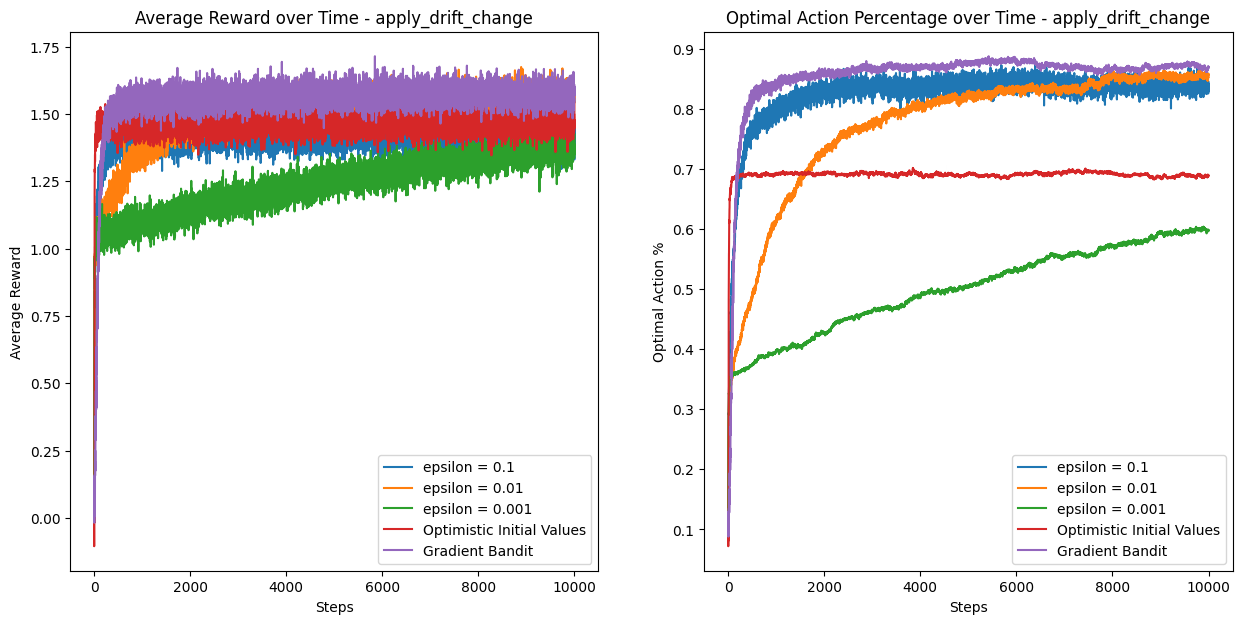

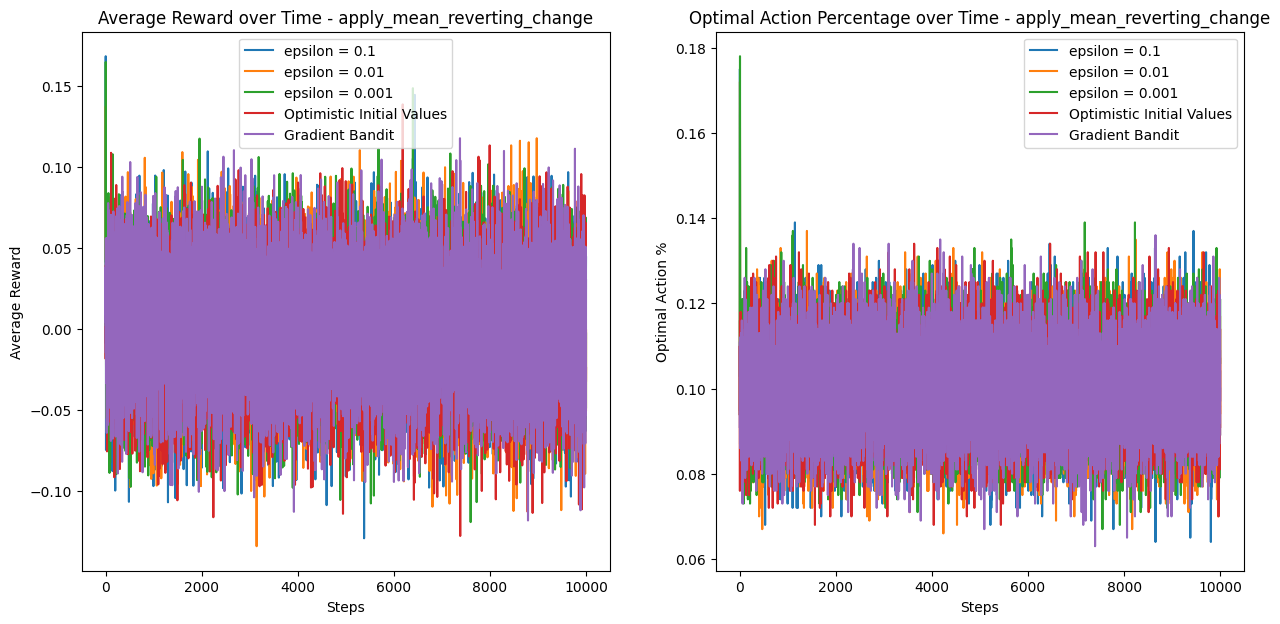

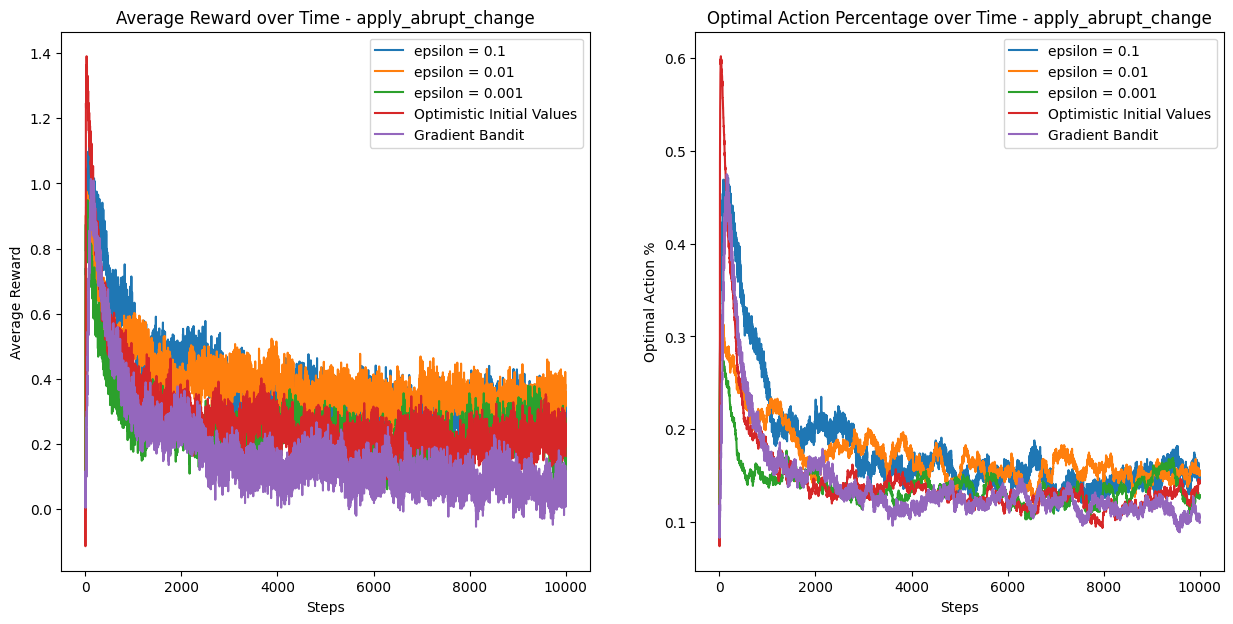

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 10
n_problems = 1000
n_steps = 10000

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    return np.random.randn(n_problems, k)

# Gradual change functions
def apply_drift_change(means, step):
    means += np.random.normal(0, 0.0012, size=means.shape)
    return means

def apply_mean_reverting_change(means, step):
    means = 0.5 * means + np.random.normal(0, 0.012, size=means.shape)
    return means

# Abrupt change function
def apply_abrupt_change(means, step):
    if np.random.rand() < 0.005:
        np.random.shuffle(means)
    return means

# Function to run the epsilon-greedy algorithm with non-stationary changes
def epsilon_greedy_non_stationary(k, n_steps, epsilon, true_means, change_fn):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == np.argmax(true_means):
            optimal_action_counts[step] = 1
        
        true_means = change_fn(true_means, step)
    
    return rewards, optimal_action_counts

# Function to run the optimistic initial values algorithm with non-stationary changes
def optimistic_initial_values_non_stationary(k, n_steps, initial_value, true_means, change_fn):
    q_values = np.ones(k) * initial_value
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == np.argmax(true_means):
            optimal_action_counts[step] = 1
        
        true_means = change_fn(true_means, step)
    
    return rewards, optimal_action_counts

# Function to run the gradient bandit algorithm with non-stationary changes
def gradient_bandit_non_stationary(k, n_steps, alpha, true_means, change_fn):
    h_values = np.zeros(k)
    action_probs = np.ones(k) / k
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = np.random.choice(np.arange(k), p=action_probs)
        
        reward = np.random.randn() + true_means[action]
        rewards[step] = reward
        
        baseline = np.mean(rewards[:step+1])
        for a in range(k):
            if a == action:
                h_values[a] += alpha * (reward - baseline) * (1 - action_probs[a])
            else:
                h_values[a] -= alpha * (reward - baseline) * action_probs[a]
        
        action_probs = np.exp(h_values) / np.sum(np.exp(h_values))
        
        if action == np.argmax(true_means):
            optimal_action_counts[step] = 1
        
        true_means = change_fn(true_means, step)
    
    return rewards, optimal_action_counts

# Run experiments
true_means_set = generate_bandit_problems(k, n_problems)
epsilons = [0.1, 0.01, 0.001]
alpha = 0.1
initial_value = 5

# Apply gradual and abrupt changes
change_fns = [apply_drift_change, apply_mean_reverting_change, apply_abrupt_change]

for change_fn in change_fns:
    avg_rewards = np.zeros((len(epsilons) + 2, n_steps))
    optimal_action_counts = np.zeros((len(epsilons) + 2, n_steps))

    for problem in range(n_problems):
        true_means = true_means_set[problem]
        
        for i, epsilon in enumerate(epsilons):
            rewards, optimal_counts = epsilon_greedy_non_stationary(k, n_steps, epsilon, true_means.copy(), change_fn)
            avg_rewards[i] += rewards
            optimal_action_counts[i] += optimal_counts
        
        rewards, optimal_counts = optimistic_initial_values_non_stationary(k, n_steps, initial_value, true_means.copy(), change_fn)
        avg_rewards[len(epsilons)] += rewards
        optimal_action_counts[len(epsilons)] += optimal_counts
        
        rewards, optimal_counts = gradient_bandit_non_stationary(k, n_steps, alpha, true_means.copy(), change_fn)
        avg_rewards[len(epsilons) + 1] += rewards
        optimal_action_counts[len(epsilons) + 1] += optimal_counts

    # Average results over all problems
    avg_rewards /= n_problems
    optimal_action_counts /= n_problems

    # Plot results
    plt.figure(figsize=(15, 7))

    # Plot average rewards
    plt.subplot(1, 2, 1)
    for i, epsilon in enumerate(epsilons):
        plt.plot(avg_rewards[i], label=f'epsilon = {epsilon}')
    plt.plot(avg_rewards[len(epsilons)], label='Optimistic Initial Values')
    plt.plot(avg_rewards[len(epsilons) + 1], label='Gradient Bandit')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title(f'Average Reward over Time - {change_fn.__name__}')

    # Plot optimal action counts
    plt.subplot(1, 2, 2)
    for i, epsilon in enumerate(epsilons):
        plt.plot(optimal_action_counts[i], label=f'epsilon = {epsilon}')
    plt.plot(optimal_action_counts[len(epsilons)], label='Optimistic Initial Values')
    plt.plot(optimal_action_counts[len(epsilons) + 1], label='Gradient Bandit')
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.legend()
    plt.title(f'Optimal Action Percentage over Time - {change_fn.__name__}')

    plt.show()


/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/1972100642.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(terminal_rewards.T, labels=["Optimistic Greedy", "Fixed Step Epsilon-Greedy", "Decreasing Step Epsilon-Greedy"])


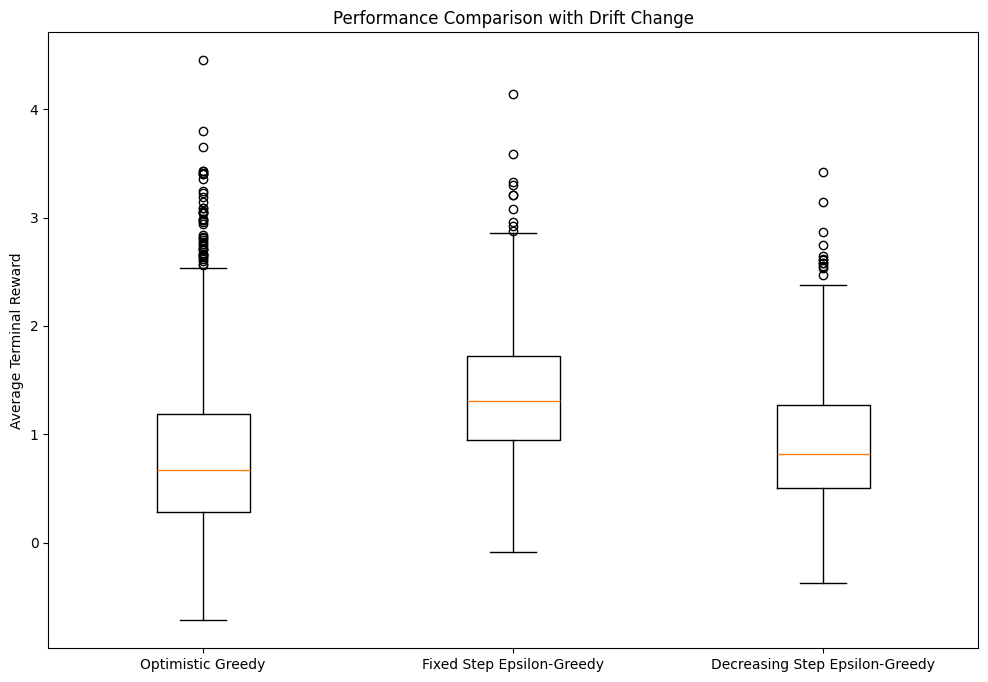

/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/1972100642.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(terminal_rewards.T, labels=["Optimistic Greedy", "Fixed Step Epsilon-Greedy", "Decreasing Step Epsilon-Greedy"])


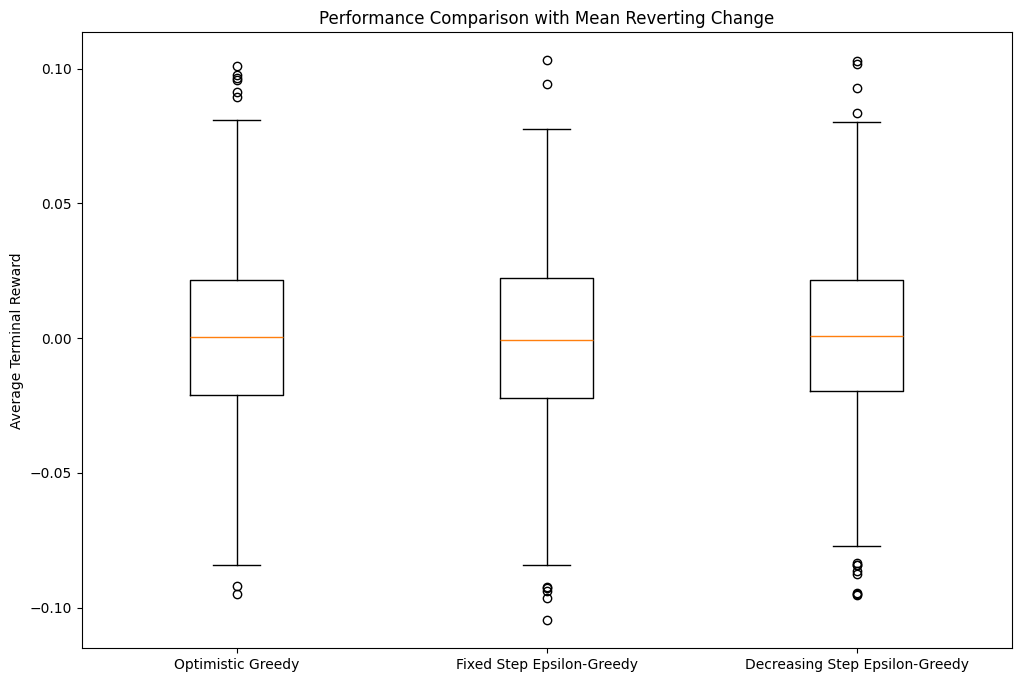

/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/1972100642.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(terminal_rewards.T, labels=["Optimistic Greedy", "Fixed Step Epsilon-Greedy", "Decreasing Step Epsilon-Greedy"])


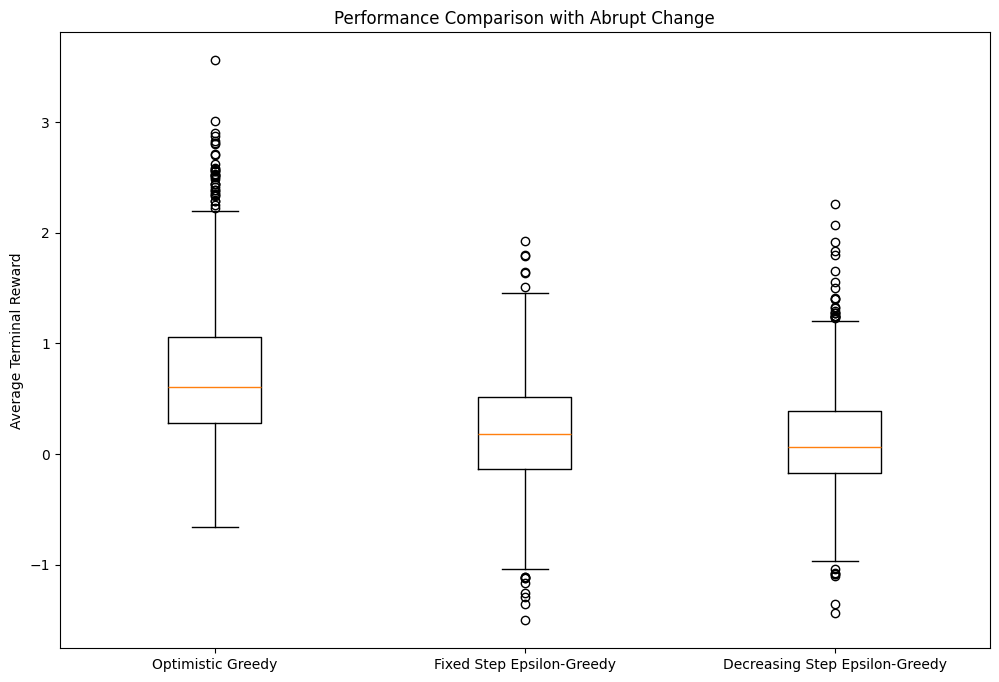

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 10
n_problems = 1000
n_steps = 20000

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    return np.random.randn(n_problems, k)

# Gradual change functions
def apply_drift_change(means):
    means += np.random.normal(0, 0.0012, size=means.shape)
    return means

def apply_mean_reverting_change(means):
    means = 0.5 * means + np.random.normal(0, 0.012, size=means.shape)
    return means

# Abrupt change function
def apply_abrupt_change(means):
    if np.random.rand() < 0.005:
        np.random.shuffle(means)
    return means

# Function to run the optimistic greedy algorithm with non-stationary changes
def optimistic_greedy_non_stationary(k, n_steps, initial_value, true_means, change_fn):
    q_values = np.ones(k) * initial_value
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        reward = np.random.randn() + true_means[action]
        q_values[action] += (reward - q_values[action]) / (step + 1)
        rewards[step] = reward
        true_means = change_fn(true_means)
    
    return rewards

# Function to run the epsilon-greedy algorithm with a fixed step size and non-stationary changes
def epsilon_greedy_fixed_step_non_stationary(k, n_steps, epsilon, true_means, change_fn):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward
        true_means = change_fn(true_means)
    
    return rewards

# Function to run the epsilon-greedy algorithm with a decreasing step size and non-stationary changes
def epsilon_greedy_decreasing_step_non_stationary(k, n_steps, epsilon, true_means, change_fn):
    q_values = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        q_values[action] += (reward - q_values[action]) / (step + 1)
        rewards[step] = reward
        true_means = change_fn(true_means)
    
    return rewards

# Run experiments
true_means_set = generate_bandit_problems(k, n_problems)
epsilon = 0.1
initial_value = 5

# Apply gradual and abrupt changes
change_fns = [apply_drift_change, apply_mean_reverting_change, apply_abrupt_change]
change_fn_names = ["Drift Change", "Mean Reverting Change", "Abrupt Change"]

for change_fn, change_fn_name in zip(change_fns, change_fn_names):
    terminal_rewards = np.zeros((3, n_problems))
    
    for problem in range(n_problems):
        true_means = true_means_set[problem].copy()
        
        rewards = optimistic_greedy_non_stationary(k, n_steps, initial_value, true_means.copy(), change_fn)
        terminal_rewards[0, problem] = np.mean(rewards[-1000:])
        
        rewards = epsilon_greedy_fixed_step_non_stationary(k, n_steps, epsilon, true_means.copy(), change_fn)
        terminal_rewards[1, problem] = np.mean(rewards[-1000:])
        
        rewards = epsilon_greedy_decreasing_step_non_stationary(k, n_steps, epsilon, true_means.copy(), change_fn)
        terminal_rewards[2, problem] = np.mean(rewards[-1000:])
    
    # Plot results
    plt.figure(figsize=(12, 8))
    plt.boxplot(terminal_rewards.T, labels=["Optimistic Greedy", "Fixed Step Epsilon-Greedy", "Decreasing Step Epsilon-Greedy"])
    plt.ylabel('Average Terminal Reward')
    plt.title(f'Performance Comparison with {change_fn_name}')
    plt.show()
